In [7]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error, r2_score

# Carregar o dataset
df = pd.read_csv('crop_yield.csv')

# Criar variáveis dummies para colunas categóricas
df = pd.get_dummies(df, columns=['Region', 'Soil_Type', 'Crop', 'Weather_Condition'])

# Separar as variáveis independentes e a variável dependente
X = df.drop('Yield_tons_per_hectare', axis=1)
y = df['Yield_tons_per_hectare']

# Dividir o dataset em conjunto de treino e teste
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Treinar o modelo de árvore de decisão
model = DecisionTreeRegressor(random_state=42)
model.fit(X_train, y_train)

# Fazer previsões
y_pred = model.predict(X_test)

# Avaliar o modelo
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f'MSE: {mse}')
print(f'R²: {r2}')

MSE: 0.5341353281670345
R²: 0.8147259141633085


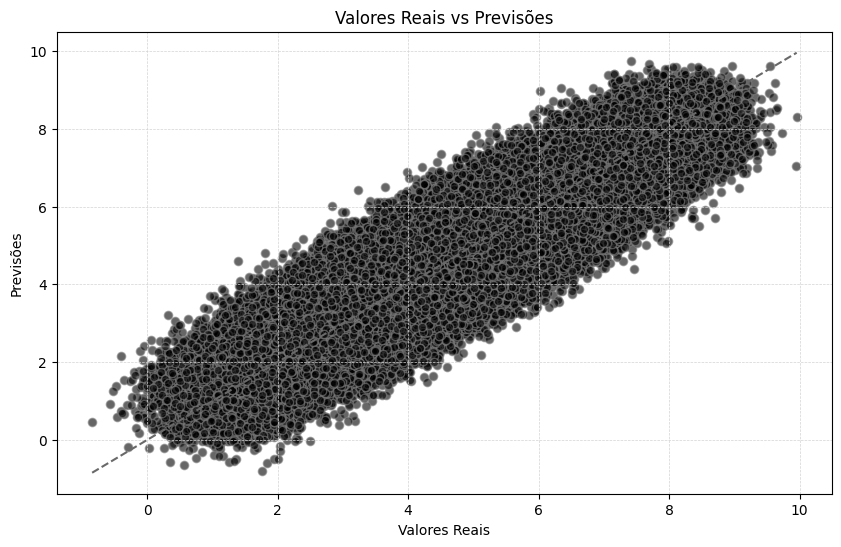

In [8]:
import matplotlib.pyplot as plt

# Visualização: Gráfico de Dispersão em Preto e Branco
plt.figure(figsize=(10, 6))

# Plotando os pontos em preto
plt.scatter(y_test, y_pred, color='black', alpha=0.6, edgecolor='gray', marker='o')

# Adicionando a linha y = x em cinza escuro
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], linestyle='--', color='dimgray')

plt.xlabel('Valores Reais')
plt.ylabel('Previsões')
plt.title('Valores Reais vs Previsões')

# Definindo a grade em cinza claro
plt.grid(color='lightgray', linestyle='--', linewidth=0.5)

# Salvando o gráfico em preto e branco
plt.savefig("valor_real_x_previsao_bw.png", format="png", dpi=300)
plt.show()


In [9]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline

# Passo 1: Carregar os dados
data = pd.read_csv('crop_yield_sampled.csv')

# Passo 2: Definir as variáveis independentes e dependentes
X = data.drop(columns=['Yield_tons_per_hectare'])
y = data['Yield_tons_per_hectare']

# Passo 3: Dividir os dados em conjuntos de treino e teste
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Passo 4: Pré-processamento
# Definindo as colunas categóricas e numéricas
categorical_features = ['Region', 'Soil_Type', 'Crop', 'Fertilizer_Used', 'Irrigation_Used', 'Weather_Condition']
numerical_features = ['Rainfall_mm', 'Temperature_Celsius', 'Days_to_Harvest']

# Criando um transformador para pré-processar os dados
preprocessor = ColumnTransformer(
    transformers=[
        ('num', 'passthrough', numerical_features),
        ('cat', OneHotEncoder(), categorical_features)
    ]
)

# Passo 5: Criar um pipeline com o preprocessor e o Decision Tree Regressor
model = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('regressor', DecisionTreeRegressor(random_state=42))
])

# Passo 6: Treinar o modelo
model.fit(X_train, y_train)

# Passo 7: Obter a importância das variáveis
# Acessando a importância das variáveis
feature_importances = model.named_steps['regressor'].feature_importances_

# Obtendo o nome das características
feature_names = (
    numerical_features + 
    list(model.named_steps['preprocessor'].transformers_[1][1].get_feature_names_out(categorical_features))
)

from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# Passo 9: Fazer previsões com o conjunto de teste
y_pred = model.predict(X_test)

# Passo 10: Calcular as métricas de avaliação
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)

# Passo 11: Exibir as métricas
print(f'Erro Quadrático Médio (MSE): {mse:.4f}')
print(f'R²: {r2:.4f}')
print(f'Média Absoluta do Erro (MAE): {mae:.4f}')
print(f'Raiz do Erro Quadrático Médio (RMSE): {rmse:.4f}')

Erro Quadrático Médio (MSE): 0.5272
R²: 0.8189
Média Absoluta do Erro (MAE): 0.5808
Raiz do Erro Quadrático Médio (RMSE): 0.7261


In [10]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error, r2_score

# Carregar o dataset
df = pd.read_csv('crop_yield_sampled.csv')

# Criar variáveis dummies para colunas categóricas
df = pd.get_dummies(df, columns=['Region', 'Soil_Type', 'Crop', 'Weather_Condition'])

# Separar as variáveis independentes e a variável dependente
X = df.drop('Yield_tons_per_hectare', axis=1)
y = df['Yield_tons_per_hectare']

# Dividir o dataset em conjunto de treino e teste
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Treinar o modelo de árvore de decisão
model = DecisionTreeRegressor(random_state=42)

# Parâmetros a serem ajustados
param_grid = {
    'max_depth': [None, 5, 10, 15],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

# Grid Search para encontrar os melhores hiperparâmetros
grid_search = GridSearchCV(estimator=model, param_grid=param_grid, scoring='neg_mean_squared_error', cv=5)
grid_search.fit(X_train, y_train)

# Melhor modelo após Grid Search
best_model = grid_search.best_estimator_

# Previsões com o melhor modelo
y_pred = best_model.predict(X_test)

# Avaliação do modelo
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)

# Resultados da avaliação
print(f"Média Absoluta do Erro (MAE): {mae:.4f}")
print(f"Erro Quadrático Médio (MSE): {mse:.4f}")
print(f"Raiz do Erro Quadrático Médio (RMSE): {rmse:.4f}")
print(f"R²: {r2:.4f}")
print("Melhores parâmetros encontrados:", grid_search.best_params_)

Média Absoluta do Erro (MAE): 0.4150
Erro Quadrático Médio (MSE): 0.2691
Raiz do Erro Quadrático Médio (RMSE): 0.5188
R²: 0.9076
Melhores parâmetros encontrados: {'max_depth': 10, 'min_samples_leaf': 4, 'min_samples_split': 10}


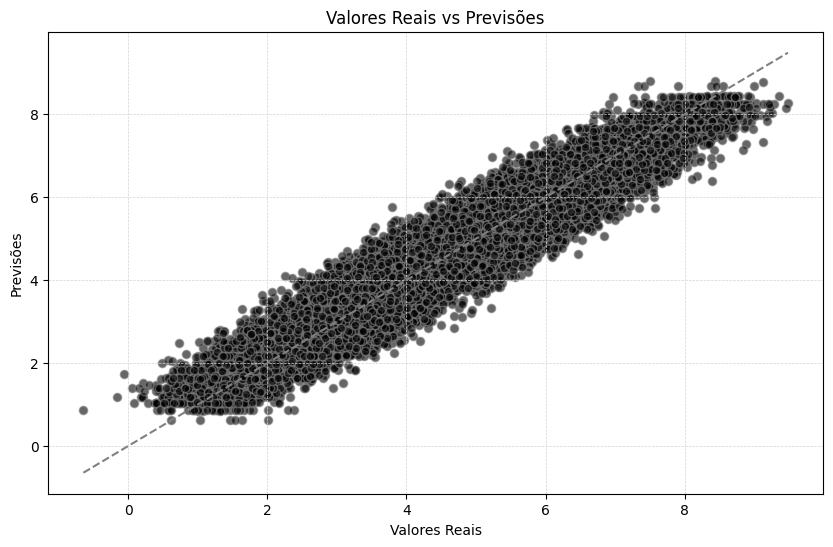

In [11]:
import matplotlib.pyplot as plt

# Visualização: Gráfico de Dispersão em Preto e Branco
plt.figure(figsize=(10, 6))

# Plotando os pontos em tons de cinza
plt.scatter(y_test, y_pred, color='black', alpha=0.6, edgecolor='gray', marker='o')

# Adicionando a linha y = x em cinza
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], linestyle='--', color='gray')

plt.xlabel('Valores Reais')
plt.ylabel('Previsões')
plt.title('Valores Reais vs Previsões')
plt.grid(color='lightgray', linestyle='--', linewidth=0.5)  # Grelha em cinza claro

# Salvando o gráfico em preto e branco
plt.savefig("valor_real_x_previsao_2_bw.png", format="png", dpi=300)
plt.show()


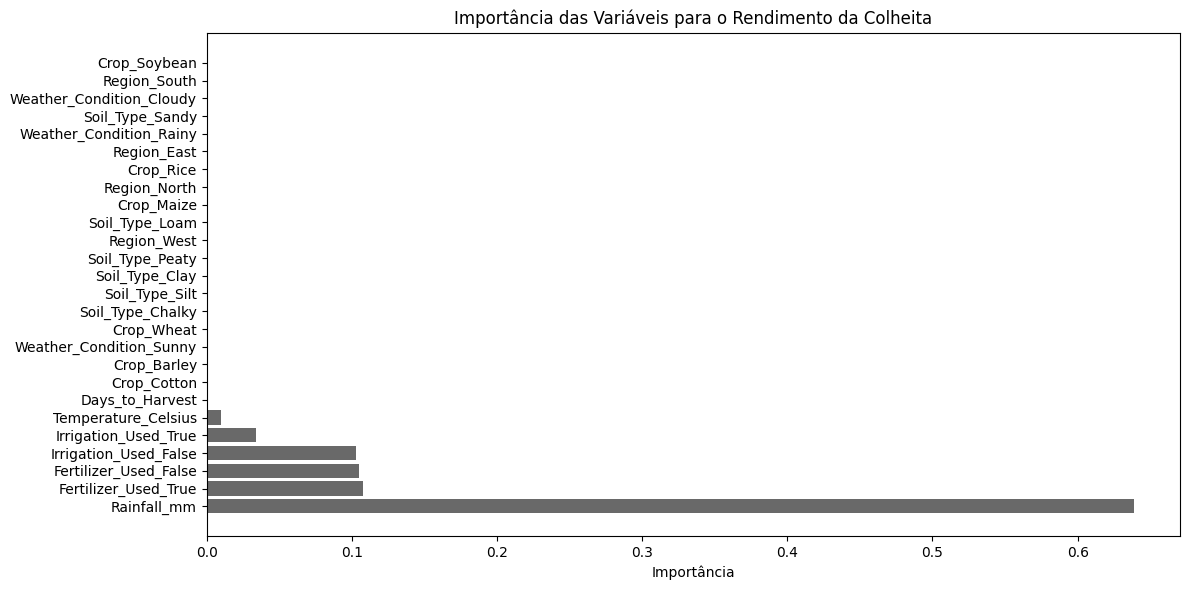

                     Feature  Importance
0                Rainfall_mm    0.638580
20      Fertilizer_Used_True    0.107862
19     Fertilizer_Used_False    0.104768
21     Irrigation_Used_False    0.102764
22      Irrigation_Used_True    0.033897
1        Temperature_Celsius    0.009718
2            Days_to_Harvest    0.001112
14               Crop_Cotton    0.000133
13               Crop_Barley    0.000105
25   Weather_Condition_Sunny    0.000096
18                Crop_Wheat    0.000091
7           Soil_Type_Chalky    0.000083
12            Soil_Type_Silt    0.000074
8             Soil_Type_Clay    0.000072
10           Soil_Type_Peaty    0.000070
6                Region_West    0.000068
9             Soil_Type_Loam    0.000068
15                Crop_Maize    0.000062
4               Region_North    0.000055
16                 Crop_Rice    0.000053
3                Region_East    0.000051
24   Weather_Condition_Rainy    0.000050
11           Soil_Type_Sandy    0.000045
23  Weather_Cond

In [12]:
# Passo 1: Carregar os dados
data = pd.read_csv('crop_yield_sampled.csv') 

# Passo 2: Definir as variáveis independentes e dependentes
X = data.drop(columns=['Yield_tons_per_hectare'])
y = data['Yield_tons_per_hectare']

# Passo 3: Dividir os dados em conjuntos de treino e teste
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Passo 4: Pré-processamento
# Definindo as colunas categóricas e numéricas
categorical_features = ['Region', 'Soil_Type', 'Crop', 'Fertilizer_Used', 'Irrigation_Used', 'Weather_Condition']
numerical_features = ['Rainfall_mm', 'Temperature_Celsius', 'Days_to_Harvest']

# Criando um transformador para pré-processar os dados
preprocessor = ColumnTransformer(
    transformers=[
        ('num', 'passthrough', numerical_features),
        ('cat', OneHotEncoder(), categorical_features)
    ]
)

# Passo 5: Criar um pipeline com o preprocessor e o Decision Tree Regressor
model = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('regressor', DecisionTreeRegressor(max_depth=10, min_samples_split=10, min_samples_leaf=4, random_state=42))
])

# Passo 6: Treinar o modelo
model.fit(X_train, y_train)

# Passo 7: Obter a importância das variáveis
# Acessando a importância das variáveis
feature_importances = model.named_steps['regressor'].feature_importances_

# Obtendo o nome das características
feature_names = (
    numerical_features + 
    list(model.named_steps['preprocessor'].transformers_[1][1].get_feature_names_out(categorical_features))
)

# Criando um DataFrame para visualizar a importância
importance_df = pd.DataFrame({'Feature': feature_names, 'Importance': feature_importances})
importance_df = importance_df.sort_values(by='Importance', ascending=False)

# Passo 8: Plotar a importância das características
plt.figure(figsize=(12, 6))
plt.barh(importance_df['Feature'], importance_df['Importance'], color='dimgray')
plt.xlabel('Importância')
plt.title('Importância das Variáveis para o Rendimento da Colheita')
plt.tight_layout()
plt.savefig("importancia_variaveis.png", format="png", dpi=300)
plt.show()

# Exibindo o DataFrame da importância
print(importance_df)

In [13]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# Selecionar as características relevantes
features = ['Fertilizer_Used', 'Irrigation_Used', 'Rainfall_mm', 'Temperature_Celsius']
X = data[features]
y = data['Yield_tons_per_hectare']

# Dividir os dados em conjuntos de treino e teste
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Definir o pré-processador para tratar variáveis categóricas e numéricas
preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), ['Rainfall_mm', 'Temperature_Celsius']),
        ('cat', OneHotEncoder(), ['Fertilizer_Used', 'Irrigation_Used'])
    ]
)

# Criar um pipeline com o pré-processador e o Decision Tree Regressor
model = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('regressor', DecisionTreeRegressor(max_depth=10, min_samples_split=10, min_samples_leaf=4, random_state=42))
])

# Treinar o modelo
model.fit(X_train, y_train)

# Fazer previsões
predictions = model.predict(X_test)

# Análise de importância das variáveis
importances = model.named_steps['regressor'].feature_importances_
feature_names = (preprocessor.transformers_[0][1].get_feature_names_out().tolist() + 
                 preprocessor.transformers_[1][1].get_feature_names_out().tolist())
importance_df = pd.DataFrame({'Feature': feature_names, 'Importance': importances})
importance_df = importance_df.sort_values(by='Importance', ascending=False)

# Mostrar a importância das variáveis
print("\nImportância das Variáveis:")
print(importance_df)


Importância das Variáveis:
                 Feature  Importance
0            Rainfall_mm    0.639832
2  Fertilizer_Used_False    0.212838
4  Irrigation_Used_False    0.102864
5   Irrigation_Used_True    0.033930
1    Temperature_Celsius    0.010537
3   Fertilizer_Used_True    0.000000


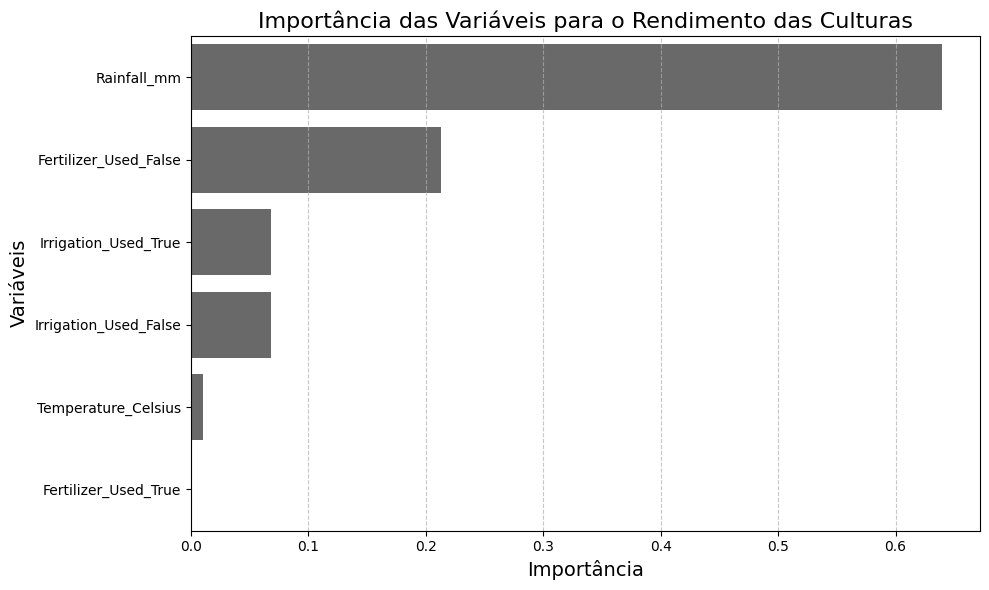

In [14]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Criar um DataFrame de exemplo com a importância das variáveis
importance_data = {
    'Feature': [
        'Rainfall_mm',
        'Fertilizer_Used_False',
        'Irrigation_Used_False',
        'Temperature_Celsius',
        'Irrigation_Used_True',
        'Fertilizer_Used_True'
    ],
    'Importance': [0.639863, 0.212808, 0.068385, 0.010554, 0.068390, 0.000000]
}

importance_df = pd.DataFrame(importance_data)

# Ordenar os dados pela importância
importance_df = importance_df.sort_values(by='Importance', ascending=False)

# Configurações do gráfico em preto e branco
plt.figure(figsize=(10, 6))
sns.barplot(data=importance_df, x='Importance', y='Feature', color='dimgray')  # Cor das barras em cinza escuro
    
# Adicionando títulos e rótulos
plt.title('Importância das Variáveis para o Rendimento das Culturas', fontsize=16)
plt.xlabel('Importância', fontsize=14)
plt.ylabel('Variáveis', fontsize=14)

# Exibir o gráfico em preto e branco
plt.grid(axis='x', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.savefig("importancia_variaveis_2_bw.png", format="png", dpi=300)
plt.show()

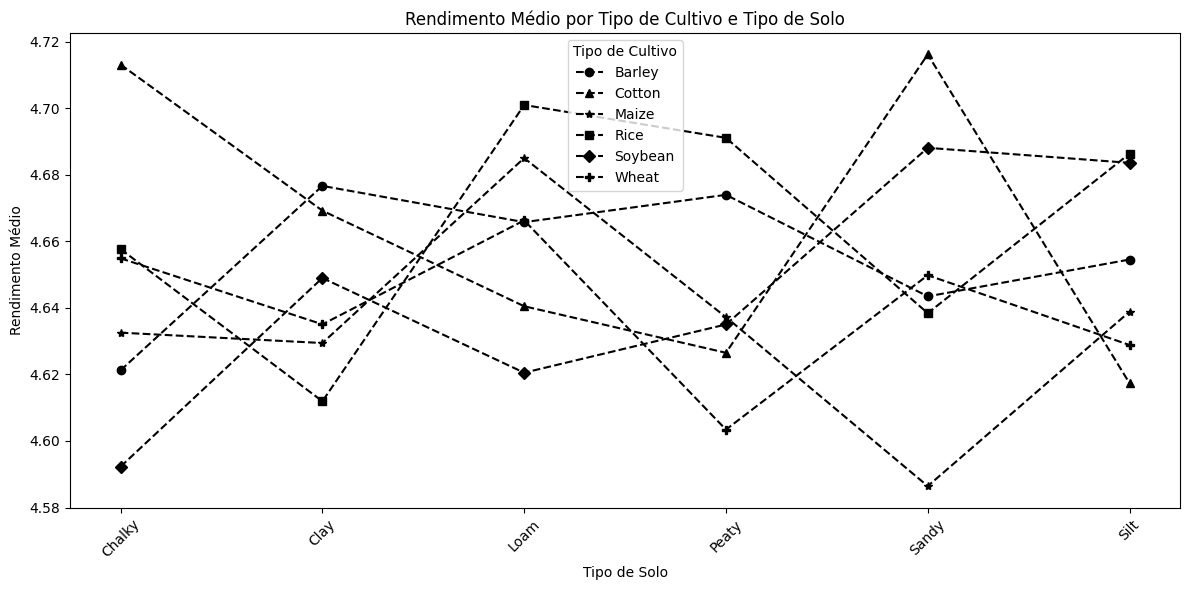

In [15]:
import pandas as pd
import matplotlib.pyplot as plt

# Criar uma nova coluna 'Soil_Type' para extrair o tipo de solo
df['Soil_Type'] = df[['Soil_Type_Chalky', 'Soil_Type_Clay', 
                       'Soil_Type_Loam', 'Soil_Type_Peaty', 
                       'Soil_Type_Sandy', 'Soil_Type_Silt']].idxmax(axis=1)

# Remover o prefixo 'Soil_Type_' para deixar apenas o tipo de solo
df['Soil_Type'] = df['Soil_Type'].str.replace('Soil_Type_', '')

# Extraindo o tipo de cultivo
df['Crop_Type'] = df[['Crop_Barley', 'Crop_Cotton', 'Crop_Maize', 
                       'Crop_Rice', 'Crop_Soybean', 'Crop_Wheat']].idxmax(axis=1).str.replace('Crop_', '')

# Calcular o rendimento médio por tipo de cultivo e tipo de solo
rendimento_medio = df.groupby(['Crop_Type', 'Soil_Type'])['Yield_tons_per_hectare'].mean().reset_index()

# Renomear colunas
rendimento_medio.columns = ['Crop_Type', 'Soil_Type', 'Average_Yield']

# Mapeamento de marcadores para cada tipo de cultivo
marcadores = ['o', '^', '*', 's', 'D', 'P']  # Marcadores para cada tipo de cultivo
plt.figure(figsize=(12, 6))

# Iterando por cada tipo de cultivo com um marcador diferente
for i, crop in enumerate(rendimento_medio['Crop_Type'].unique()):
    subset = rendimento_medio[rendimento_medio['Crop_Type'] == crop]
    plt.plot(subset['Soil_Type'], subset['Average_Yield'], marker=marcadores[i % len(marcadores)], label=crop, color='black', linestyle='--')

# Configurações do gráfico
plt.xlabel('Tipo de Solo')
plt.ylabel('Rendimento Médio')
plt.title('Rendimento Médio por Tipo de Cultivo e Tipo de Solo')
plt.xticks(rotation=45)
plt.legend(title='Tipo de Cultivo')
plt.tight_layout()

# Salvando o gráfico em preto e branco
plt.savefig("rendimento_medio_bw.png", format="png", dpi=300)
plt.show()

In [16]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

data = pd.read_csv('crop_yield_prediction.csv')

# Selecionar as características relevantes
features = ['Fertilizer_Used', 'Irrigation_Used', 'Rainfall_mm', 'Temperature_Celsius']
X = data[features]
y = data['Yield_tons_per_hectare']

# Dividir os dados em conjuntos de treino e teste
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Definir o pré-processador para tratar variáveis categóricas e numéricas
preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), ['Rainfall_mm', 'Temperature_Celsius']),
        ('cat', OneHotEncoder(), ['Fertilizer_Used', 'Irrigation_Used'])
    ]
)

# Criar um pipeline com o pré-processador e o Decision Tree Regressor
model = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('regressor', DecisionTreeRegressor(max_depth=10, min_samples_split=10, min_samples_leaf=4, random_state=42))
])

# Treinar o modelo
model.fit(X_train, y_train)

# Fazer previsões
predictions = model.predict(X_test)

# Criar um DataFrame com novos dados para previsão
# Linhas #64157 e #104 do dataset serão utilizadas como base da previsão
new_data = pd.DataFrame({
    'Region': ['East', 'South'],
    'Soil_Type': ['Silt', 'Clay'],
    'Crop': ['Rice', 'Barley'],
    'Rainfall_mm': [995, 244],
    'Temperature_Celsius': [34.4, 20.2],
    'Fertilizer_Used': [False, True],
    'Irrigation_Used': [True, False],
    'Weather_Condition': ['Rainy', 'Rainy'],
    'Days_to_Harvest': [124, 69]
})

# Fazer previsões com novos dados
predictions = model.predict(new_data)

# Mostrar as previsões
print("Previsões de Rendimento para os Novos Dados:")
print("Valor Original da Amostra: ~6.48 e ~3.35")
for i, pred in enumerate(predictions):
    print(f"Cultura: {new_data['Crop'][i]}, Valor Previsto: {pred:.2f} toneladas por hectare")

Previsões de Rendimento para os Novos Dados:
Valor Original da Amostra: ~6.48 e ~3.35
Cultura: Rice, Valor Previsto: 6.80 toneladas por hectare
Cultura: Barley, Valor Previsto: 3.03 toneladas por hectare


In [17]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error, r2_score

# Carregar o dataset
#Foi feito um processo de Amostragem Estratificada para reduzir 1.000.000 para 100.000 mantendo a distribuição dos valores
df = pd.read_csv('crop_yield_sampled.csv')  # Descomente e insira o caminho do seu arquivo .csv

# Converter variáveis categóricas em variáveis dummy
df = pd.get_dummies(df, columns=['Region', 'Soil_Type', 'Crop', 'Fertilizer_Used', 'Irrigation_Used', 'Weather_Condition'])

# Separar variáveis preditoras e variável alvo
X = df.drop('Days_to_Harvest', axis=1)
y = df['Days_to_Harvest']

# Dividir o dataset em conjuntos de treinamento e teste
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Criar o modelo de Árvore de Decisão Regressiva
model = DecisionTreeRegressor(max_depth=10, min_samples_split=10, min_samples_leaf=4, random_state=42)

# Treinar o modelo
model.fit(X_train, y_train)

# Fazer previsões no conjunto de teste
y_pred = model.predict(X_test)

# Avaliação do modelo
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)

# Resultados da avaliação
print(f"Média Absoluta do Erro (MAE): {mae:.4f}")
print(f"Erro Quadrático Médio (MSE): {mse:.4f}")
print(f"Raiz do Erro Quadrático Médio (RMSE): {rmse:.4f}")
print(f"R²: {r2:.4f}")

# Prever o tempo de colheita para uma nova entrada
nova_entrada = {
    'Rainfall_mm': 800, 
    'Temperature_Celsius': 25, 
    'Yield_tons_per_hectare': 5, 
    # Adicione aqui outras colunas necessárias com valores apropriados
}
nova_entrada_df = pd.DataFrame([nova_entrada])

# Se o novo DataFrame tiver variáveis dummy, você deve aplicar o mesmo processo
nova_entrada_df = pd.get_dummies(nova_entrada_df)

# Certifique-se de que a nova entrada tem o mesmo número de colunas que X
nova_entrada_df = nova_entrada_df.reindex(columns=X.columns, fill_value=0)

# Fazer a previsão
previsao_dias_colheita = model.predict(nova_entrada_df)
print(f'A previsão de dias até a colheita é: {previsao_dias_colheita[0]}')# Parâmetros a serem ajustados


#ESSA PREDIÇÃO NÃO ESTÁ ADEQUADA, PORTANTO, SERVIRÁ APENAS COMO INFORMAÇÃO ADICIONAL;

Média Absoluta do Erro (MAE): 22.5961
Erro Quadrático Médio (MSE): 680.1958
Raiz do Erro Quadrático Médio (RMSE): 26.0806
R²: -0.0063
A previsão de dias até a colheita é: 104.24957315278186
